In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from cnn import MiniVGGNet
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2
import os

In [4]:
images = []
labels = []

for imagePath in list(paths.list_images("SMILEs")):
    image = cv2.imread(imagePath)
    image = imutils.resize(image, width = 32)
    image = img_to_array(image)
    images.append(image)
    
    label = imagePath.split(os.path.sep)[-3]
    label = "smiling" if label == "positives" else "not smiling"
    labels.append(label)

In [5]:
images = np.array(images, dtype="float")/ 255.0
labels = np.array(labels)

le = LabelEncoder().fit(labels)
labels = to_categorical(le.transform(labels), 2)

classTotals = labels.sum(axis=0)
classWeight = dict()

for i in range(0, len(classTotals)):
    classWeight[i] = classTotals.max() / classTotals[i]

In [6]:
(trainX, testX, trainY, testY) = train_test_split(images,
    labels, test_size=0.20, stratify=labels)

model = MiniVGGNet.MiniVGGNet.build(width=32, height=32, depth=3, classes=2)
model.compile(loss="binary_crossentropy", optimizer="adam",
    metrics=["accuracy"])

H = model.fit(trainX, trainY, validation_data=(testX, testY),
    class_weight=classWeight, batch_size=32, epochs=15, verbose=1)

Epoch 1/15
330/330 [==============================] - 16s 12ms/step - loss: 0.6262 - accuracy: 0.8263 - val_loss: 0.4440 - val_accuracy: 0.8530
Epoch 2/15
330/330 [==============================] - 3s 10ms/step - loss: 0.4365 - accuracy: 0.8791 - val_loss: 0.2249 - val_accuracy: 0.9142
Epoch 3/15
330/330 [==============================] - 3s 9ms/step - loss: 0.3676 - accuracy: 0.8986 - val_loss: 0.2668 - val_accuracy: 0.8963
Epoch 4/15
330/330 [==============================] - 3s 9ms/step - loss: 0.3398 - accuracy: 0.9075 - val_loss: 0.3039 - val_accuracy: 0.8625
Epoch 5/15
330/330 [==============================] - 3s 9ms/step - loss: 0.3124 - accuracy: 0.9146 - val_loss: 0.7600 - val_accuracy: 0.8435
Epoch 6/15
330/330 [==============================] - 3s 9ms/step - loss: 0.3092 - accuracy: 0.9158 - val_loss: 0.6298 - val_accuracy: 0.8374
Epoch 7/15
330/330 [==============================] - 3s 9ms/step - loss: 0.3604 - accuracy: 0.9006 - val_loss: 0.2503 - val_accuracy: 0.9020
Epo

In [7]:
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=le.classes_))

              precision    recall  f1-score   support

 not smiling       0.95      0.94      0.94      1895
     smiling       0.84      0.88      0.86       738

    accuracy                           0.92      2633
   macro avg       0.90      0.91      0.90      2633
weighted avg       0.92      0.92      0.92      2633



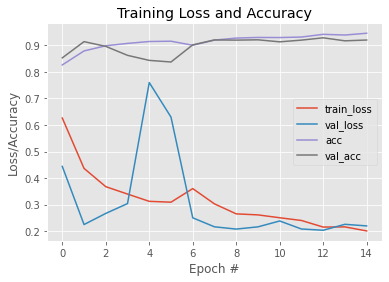

In [8]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 15), H.history["accuracy"], label="acc")
plt.plot(np.arange(0, 15), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [9]:
model.save('model/output.h5')